In [78]:
import numpy as np
import pandas as pd

In [100]:
df=pd.read_csv(r"E:\python\DsResearch\Media and Technology\Media and Technology\Global YouTube Statistics.csv" , encoding='latin1')

In [101]:
print(df.head)

<bound method NDFrame.head of       rank                    Youtuber  subscribers   video views  \
0        1                    T-Series  245000000.0  2.280000e+11   
1        2              YouTube Movies  170000000.0  0.000000e+00   
2        3                     MrBeast  166000000.0  2.836884e+10   
3        4  Cocomelon - Nursery Rhymes  162000000.0  1.640000e+11   
4        5                   SET India  159000000.0  1.480000e+11   
...    ...                         ...          ...           ...   
1001   779                    The Dodo   14200000.0  9.964117e+09   
1002   787            Supercar Blondie   14100000.0  5.405563e+09   
1003   871        Just For Laughs Gags   13300000.0  7.406629e+09   
1004   872            Kabita's Kitchen   13300000.0  2.831276e+09   
1005   873                  BanderitaX   13300000.0  4.129249e+09   

              category                       Title  uploads  \
0                Music                    T-Series    20082   
1     Film & An

In [102]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [103]:
columns = ['Gross tertiary education enrollment (%)', 'created_date', 'created_year', 'subscribers_for_last_30_days', 'subscribers', 'video views', 'Population', 'Urban_population', 'Latitude', 'uploads', 'Longitude', 'Unemployment rate']
df[columns] = imputer.fit_transform(df[columns])

In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['subscribers', 'video views', 'uploads', 'video_views_for_the_last_30_days', 'subscribers_for_last_30_days']] = scaler.fit_transform(df[['subscribers', 'video views', 'uploads', 'video_views_for_the_last_30_days', 'subscribers_for_last_30_days']])

In [105]:
df.drop_duplicates(inplace=True)

In [106]:
print(df.columns)

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country of origin', 'Country', 'Abbreviation',
       'channel_type', 'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')


In [107]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
cat_features = ['category', 'Country', 'channel_type']
encoded_features = encoder.fit_transform(df[cat_features])
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(cat_features))
df = pd.concat([df, encoded_df], axis=1)

In [108]:
# Sort the DataFrame by 'subscribers' column in descending order
top_10_channels = df.sort_values(by='subscribers', ascending=False).head(10)
# Display the top 10 YouTube channels based on subscribers
print(top_10_channels[['Youtuber', 'subscribers']])

                     Youtuber  subscribers
0                    T-Series    12.464468
1              YouTube Movies     8.249796
2                     MrBeast     8.025014
3  Cocomelon - Nursery Rhymes     7.800232
4                   SET India     7.631645
5                       Music     5.383820
6         ýýý Kids Diana Show     4.990451
7                   PewDiePie     4.934255
8                 Like Nastya     4.653277
9               Vlad and Niki     4.254288


In [113]:
# Group the data by 'category' and calculate the mean of 'subscribers' for each category
average_subscribers_per_category = df.groupby('category')['subscribers'].mean()

In [114]:
category_with_highest_average_subscribers = average_subscribers_per_category.idxmax()
# Find the highest average number of subscribers
highest_average_subscribers = average_subscribers_per_category.max()

print("Category with the highest average number of subscribers:", category_with_highest_average_subscribers)
print("Highest average number of subscribers in this category:", highest_average_subscribers)

Category with the highest average number of subscribers: Shows
Highest average number of subscribers in this category: 1.0351440093037227


In [115]:
# Group the data by 'category' and calculate the mean of 'uploads' for each category
average_videos_uploaded_per_category = df.groupby('category')['uploads'].mean()

# Display the average number of videos uploaded by YouTube channels in each category
print(average_videos_uploaded_per_category)

category
Autos & Vehicles        -0.213748
Comedy                  -0.236645
Education               -0.177161
Entertainment            0.084799
Film & Animation        -0.185424
Gaming                  -0.142744
Howto & Style           -0.219561
Movies                  -0.165102
Music                   -0.200557
News & Politics          3.037700
Nonprofits & Activism    2.756253
People & Blogs           0.002601
Pets & Animals          -0.138684
Science & Technology    -0.207410
Shows                    0.537332
Sports                   0.156577
Trailers                -0.068487
Travel & Events         -0.247046
Name: uploads, dtype: float64


In [116]:
channel_counts_per_country = df['Country'].value_counts()

# Select the top 5 countries
top_5_countries = channel_counts_per_country.head(5)

# Display the top 5 countries with the highest number of YouTube channels
print(top_5_countries)

Country
United States     313
India             167
Brazil             62
United Kingdom     43
Mexico             33
Name: count, dtype: int64


In [117]:
channel_type_distribution = df.pivot_table(index='category', columns='channel_type', aggfunc='size', fill_value=0)

# Display the distribution of channel types across different categories
print(channel_type_distribution)

channel_type           Animals  Autos  Comedy  Education  Entertainment  Film  \
category                                                                        
Autos & Vehicles             0      1       0          0              1     0   
Comedy                       0      0      38          0             20     1   
Education                    0      0       0         35              3     2   
Entertainment                0      1       5          2            168     6   
Film & Animation             0      0       1          2             16    17   
Gaming                       0      1       1          0             18     2   
Howto & Style                0      0       0          0              7     0   
Movies                       0      0       0          0              0     2   
Music                        0      0       0          1             12     5   
News & Politics              0      0       0          0              3     0   
Nonprofits & Activism       

In [118]:
# Calculate the Pearson correlation coefficient between 'subscribers' and 'video views'
correlation = df['subscribers'].corr(df['video views'])

# Display the correlation coefficient
print("Pearson correlation coefficient between subscribers and video views:", correlation)

Pearson correlation coefficient between subscribers and video views: 0.7507360370837933


In [119]:
# Calculate the average monthly earnings for each category
average_monthly_earnings_per_category = df.groupby('category')['lowest_monthly_earnings'].mean()

# Display the average monthly earnings for each category
print(average_monthly_earnings_per_category)

category
Autos & Vehicles          68300.000000
Comedy                    41867.536232
Education                 43371.311333
Entertainment             39393.724370
Film & Animation          46802.533556
Gaming                    16957.979574
Howto & Style             12053.692821
Movies                    28400.000000
Music                     34764.449801
News & Politics           40192.625000
Nonprofits & Activism     24400.000000
People & Blogs            33485.993969
Pets & Animals            49975.500000
Science & Technology      12635.411765
Shows                    126961.538462
Sports                    50063.636364
Trailers                  22600.000000
Travel & Events            7800.000000
Name: lowest_monthly_earnings, dtype: float64


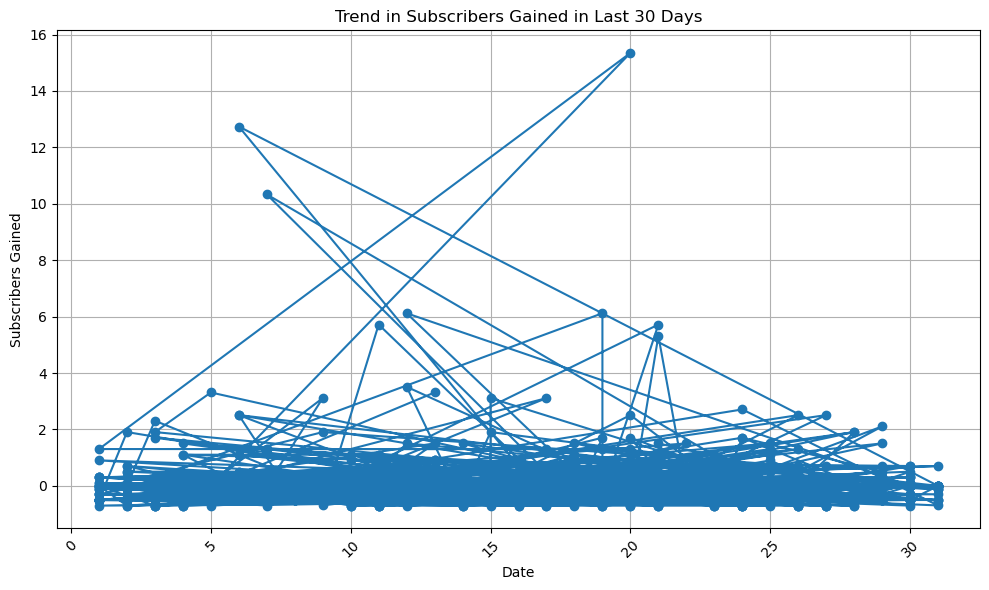

In [120]:
import matplotlib.pyplot as plt

# Plot the trend in subscribers gained in the last 30 days
plt.figure(figsize=(10, 6))
plt.plot(df['created_date'], df['subscribers_for_last_30_days'], marker='o', linestyle='-')
plt.title('Trend in Subscribers Gained in Last 30 Days')
plt.xlabel('Date')
plt.ylabel('Subscribers Gained')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

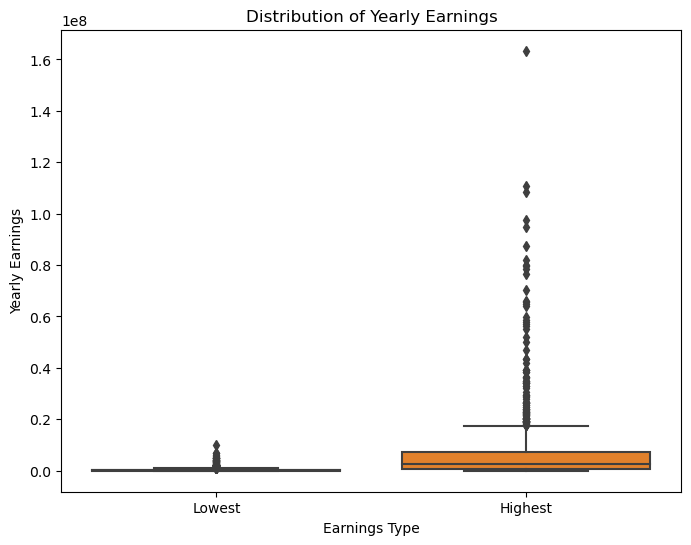

In [121]:
import seaborn as sns

# Create a box plot to visualize the distribution of yearly earnings
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['lowest_yearly_earnings', 'highest_yearly_earnings']])
plt.title('Distribution of Yearly Earnings')
plt.ylabel('Yearly Earnings')
plt.xlabel('Earnings Type')
plt.xticks(ticks=[0, 1], labels=['Lowest', 'Highest'])
plt.show()

In [123]:
from scipy import stats

# Calculate z-scores for the 'lowest_yearly_earnings' column
z_scores = stats.zscore(df['lowest_yearly_earnings'])

# Identify outliers based on z-scores
outliers = df[abs(z_scores) > 3]

# Display the outliers
print("Outliers in terms of yearly earnings:")
print(outliers[['Youtuber', 'lowest_yearly_earnings']])

Outliers in terms of yearly earnings:
                       Youtuber  lowest_yearly_earnings
0                      T-Series               6800000.0
2                       MrBeast               4000000.0
3    Cocomelon - Nursery Rhymes               5900000.0
4                     SET India               5500000.0
15                     Sony SAB               5000000.0
21                       Zee TV               5100000.0
26                    Colors TV               3600000.0
56                  HAR PAL GEO               4000000.0
65               ARY Digital HD               3400000.0
83                  GR6 EXPLODE               4900000.0
132               BETER Bï¿½ï¿½               4400000.0
139                    StarPlus               5000000.0
211            Alan Chikin Chow               3100000.0
212                   PANDA BOI               3700000.0
302         KL BRO Biju Rithvik               6100000.0
310              LeoNata Family               3500000.0
332  ZAMZA

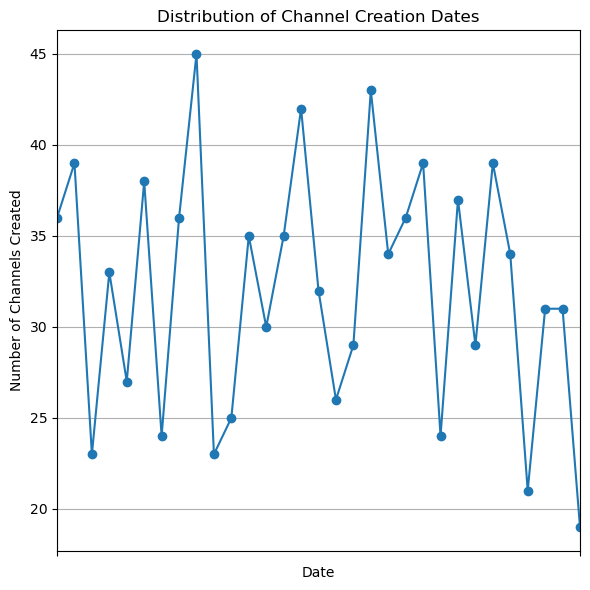

In [132]:
# Convert 'created_date' column to datetime
df['created_date'] = pd.to_datetime(df['created_date'])

# Count the number of channels created in each year and month
channel_creation_counts = df['created_date'].value_counts().sort_index()

# Plot the distribution of channel creation dates
plt.figure(figsize=(6, 6))
channel_creation_counts.plot(marker='o', linestyle='-')
plt.title('Distribution of Channel Creation Dates')
plt.xlabel('Date')
plt.ylabel('Number of Channels Created')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [135]:
# Check if the DataFrame contains the required columns
print(df[['Gross tertiary education enrollment (%)', 'Country']])

# Group the data by country and calculate the mean of tertiary education enrollment and the count of channels
country_data = df.groupby('Country').agg({'Gross tertiary education enrollment (%)': 'mean', 'Youtuber': 'count'})

# Calculate the Pearson correlation coefficient between gross tertiary education enrollment and the number of channels in each country
correlation = country_data.corr().iloc[0, 1]

# Display the correlation coefficient
print("Pearson correlation coefficient between gross tertiary education enrollment and the number of YouTube channels:", correlation)

     Gross tertiary education enrollment (%)         Country
0                                       28.1           india
1                                       88.2   United States
2                                       88.2   United States
3                                       88.2   United States
4                                       28.1           India
..                                       ...             ...
990                                     51.3          Brazil
991                                     28.1           India
992                                     60.0  United Kingdom
993                                     67.0          Sweden
994                                     28.1           India

[995 rows x 2 columns]
Pearson correlation coefficient between gross tertiary education enrollment and the number of YouTube channels: 0.1100690159206929


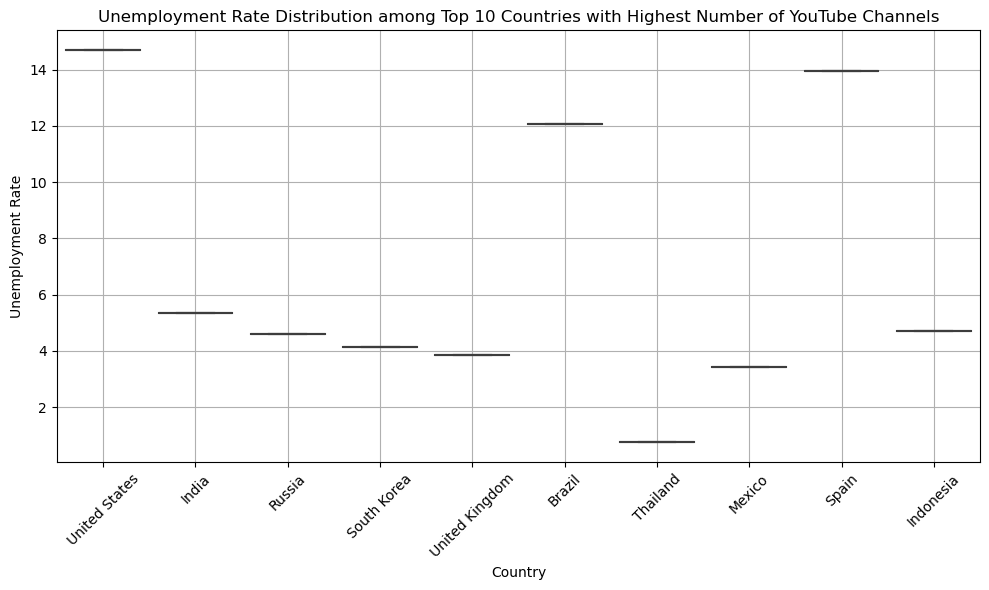

In [138]:
# Identify the top 10 countries with the highest number of YouTube channels
top_10_countries = df['Country'].value_counts().head(10).index

# Extract the unemployment rate for each of these countries
unemployment_rates_top_10 = df[df['Country'].isin(top_10_countries)][['Country', 'Unemployment rate']]

#  Analyze the distribution of unemployment rates among these countries
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=unemployment_rates_top_10, x='Country', y='Unemployment rate')
plt.title('Unemployment Rate Distribution among Top 10 Countries with Highest Number of YouTube Channels')
plt.xlabel('Country')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

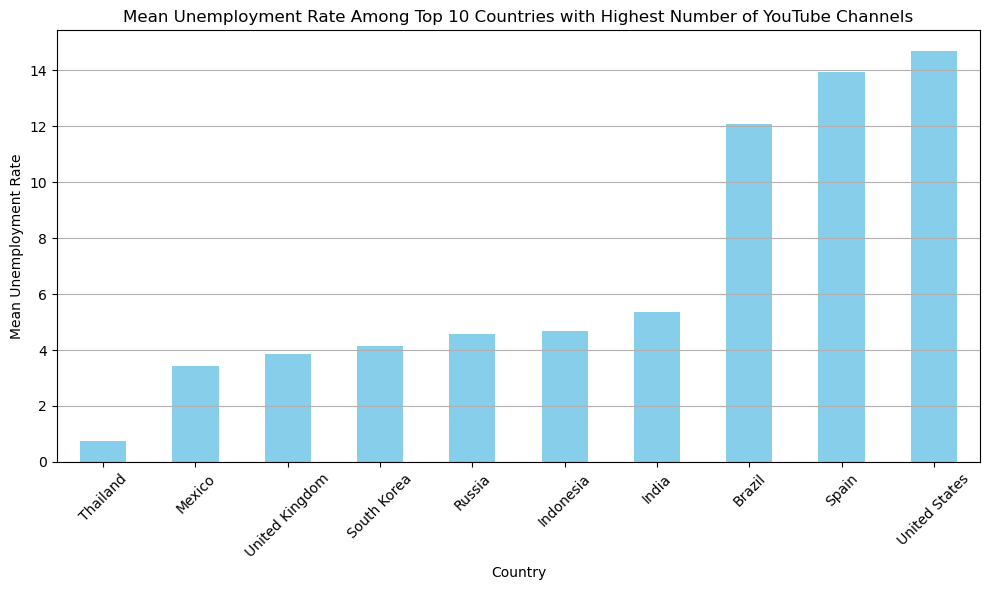

In [139]:
top_10_data = df[df['Country'].isin(top_10_countries)]
# Group the data by country and calculate the mean unemployment rate
mean_unemployment_rate = top_10_data.groupby('Country')['Unemployment rate'].mean()

# Plot the variation in unemployment rates among the top 10 countries
plt.figure(figsize=(10, 6))
mean_unemployment_rate.sort_values().plot(kind='bar', color='skyblue')
plt.title('Mean Unemployment Rate Among Top 10 Countries with Highest Number of YouTube Channels')
plt.xlabel('Country')
plt.ylabel('Mean Unemployment Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [141]:
# Filter the DataFrame to include only data for countries with YouTube channels
countries_with_channels = df['Country'].unique()

# Calculate the average urban population percentage for countries with YouTube channels
average_urban_population = df[df['Country'].isin(countries_with_channels)]['Urban_population'].mean()

# Display the average urban population percentage
print("Average urban population percentage in countries with YouTube channels:", average_urban_population)

Average urban population percentage in countries with YouTube channels: 224185280.8019255


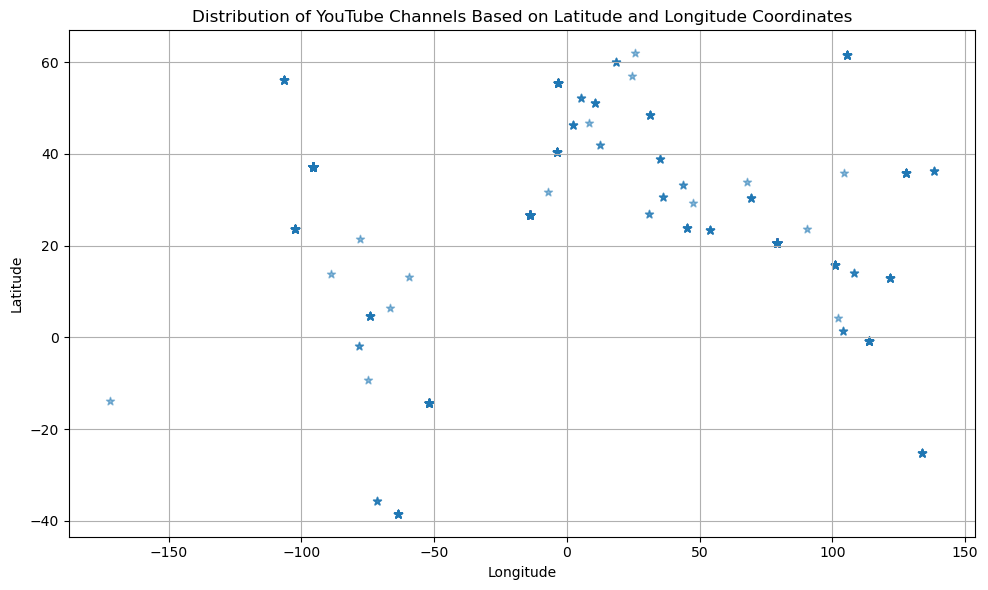

In [150]:
import matplotlib.pyplot as plt

# Plot the distribution of YouTube channels based on latitude and longitude coordinates
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5, marker='*')
plt.title('Distribution of YouTube Channels Based on Latitude and Longitude Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()

In [151]:
# Calculate the Pearson correlation coefficient between 'subscribers' and 'Population'
correlation = df['subscribers'].corr(df['Population'])

# Display the correlation coefficient
print("Correlation between the number of subscribers and the population of a country:", correlation)

Correlation between the number of subscribers and the population of a country: 0.07864505211020395


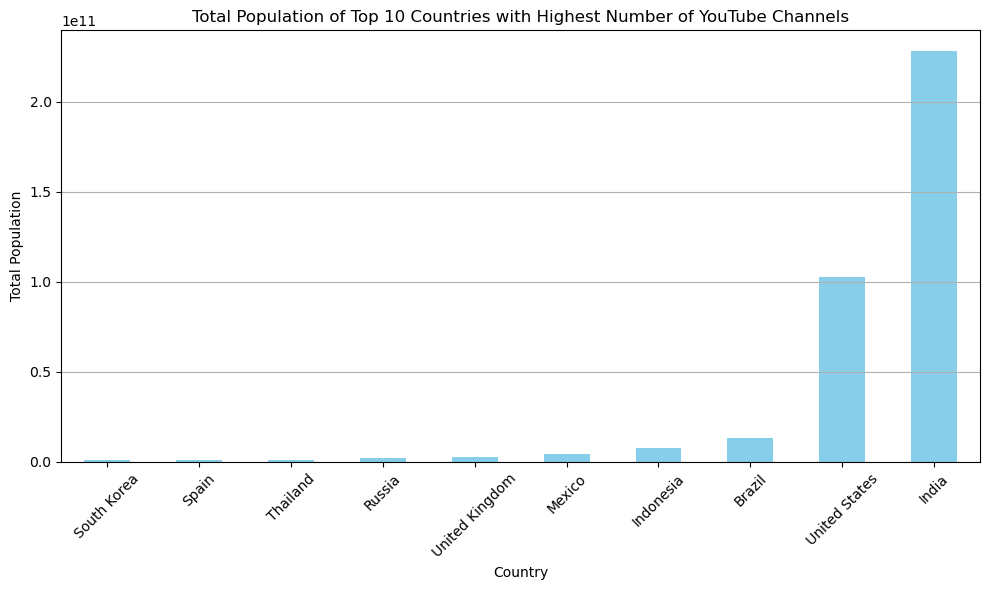

In [152]:
# Get the top 10 countries with the highest number of YouTube channels
top_10_countries = df['Country'].value_counts().head(10).index

# Filter the DataFrame to include only data for the top 10 countries
top_10_data = df[df['Country'].isin(top_10_countries)]

# Group the data by country and calculate the total population
total_population = top_10_data.groupby('Country')['Population'].sum()

# Plot the comparison of total populations among the top 10 countries
plt.figure(figsize=(10, 6))
total_population.sort_values().plot(kind='bar', color='skyblue')
plt.title('Total Population of Top 10 Countries with Highest Number of YouTube Channels')
plt.xlabel('Country')
plt.ylabel('Total Population')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [153]:
# Calculate the Pearson correlation coefficient between 'subscribers_for_last_30_days' and 'Unemployment rate'
correlation = df['subscribers_for_last_30_days'].corr(df['Unemployment rate'])

# Display the correlation coefficient
print("Correlation between subscribers gained in the last 30 days and unemployment rate:", correlation)

Correlation between subscribers gained in the last 30 days and unemployment rate: -0.016647317690327623


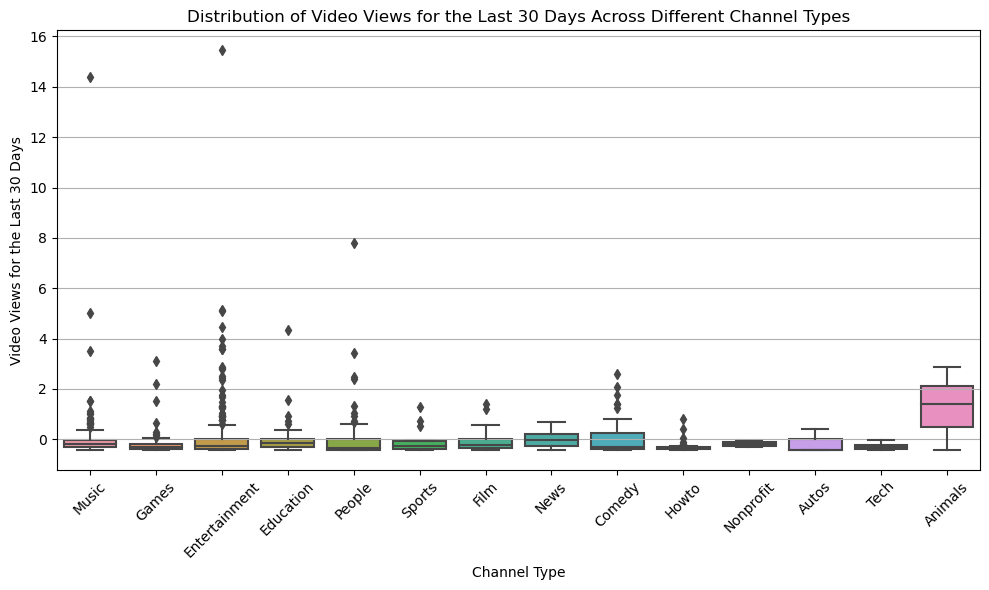

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot to visualize the distribution of video views for the last 30 days across different channel types
plt.figure(figsize=(10, 6))
sns.boxplot(x='channel_type', y='video_views_for_the_last_30_days', data=df)
plt.title('Distribution of Video Views for the Last 30 Days Across Different Channel Types')
plt.xlabel('Channel Type')
plt.ylabel('Video Views for the Last 30 Days')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

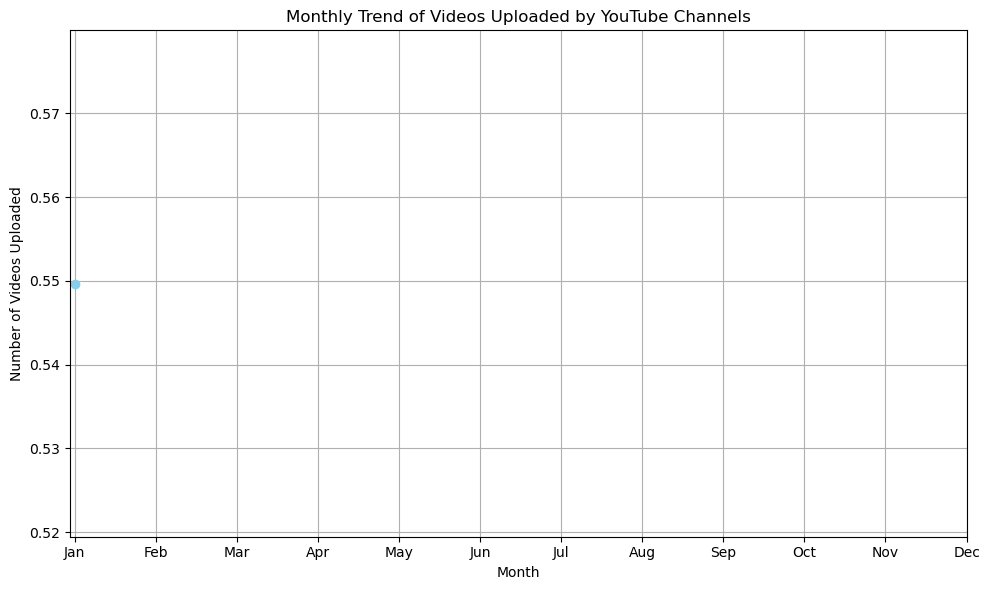

In [159]:
# Extract the month from the 'created_date' column
df['created_month'] = df['created_date'].dt.month

# Group the data by month and count the number of videos uploaded in each month
monthly_video_counts = df.groupby('created_month')['uploads'].sum()

# Plot the monthly trend of video uploads
plt.figure(figsize=(10, 6))
monthly_video_counts.plot(marker='o', color='skyblue')
plt.title('Monthly Trend of Videos Uploaded by YouTube Channels')
plt.xlabel('Month')
plt.ylabel('Number of Videos Uploaded')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

In [158]:
# Calculate the total number of months since the creation of each channel
current_year = 2024
current_month = 4
df['total_months_since_creation'] = (current_year - df['created_year']) * 12 + (current_month - df['created_month'])

# Calculate the average number of subscribers gained per month for each channel
df['average_subscribers_per_month'] = df['subscribers'] / df['total_months_since_creation']

# Calculate the overall average across all channels
overall_average = np.mean(df['average_subscribers_per_month'])

# Display the overall average
print("Average number of subscribers gained per month since channel creation till now:", overall_average)

Average number of subscribers gained per month since channel creation till now: -0.0006118357553323579
